## Маленькое задание по классификации

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('wines_classification.csv')

In [4]:
data.color.replace({'red':1, 'white':0}, inplace=True)

legend:
- 0 - white wine
- 1 - red vine

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,7.747500,0.42550,0.334750,4.980000,0.069800,25.625000,93.450000,0.995595,3.245000,0.587500,10.587500,5.800000,0.525000
std,1.448073,0.18194,0.173086,4.166884,0.038903,15.156766,63.581141,0.002658,0.154638,0.147296,1.223737,0.790975,0.505736
min,6.100000,0.17000,0.000000,1.400000,0.021000,4.000000,8.000000,0.988220,2.920000,0.380000,9.100000,4.000000,0.000000
25%,6.775000,0.29250,0.257500,2.175000,0.048250,14.500000,37.750000,0.995045,3.130000,0.495000,9.500000,5.000000,0.000000
50%,7.450000,0.39500,0.325000,2.875000,0.064000,23.500000,87.000000,0.996200,3.220000,0.580000,10.500000,6.000000,1.000000
75%,7.900000,0.50000,0.400000,6.512500,0.082250,32.750000,141.000000,0.997315,3.355000,0.662500,11.025000,6.000000,1.000000
max,12.000000,0.91500,1.000000,19.950000,0.250000,64.000000,227.000000,0.999600,3.570000,1.060000,13.600000,8.000000,1.000000


Данные - уже знакомый набор данных о химическом составе испанских и португальских вин. 
В задаче классификации предстоит построить модель, которая будет по химическому составу отличать красные вина от белых.

В данные добавлен столбец color, который принимает значения red или white в зависимости от того, что это за вино.

In [6]:
data.color.value_counts()

1    21
0    19
Name: color, dtype: int64

In [7]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [17]:
data.shape

(40, 12)

**Задача - создать классификатор, который по признакам определял бы белое вино или красное.**

Особенность - мало данных - это очень небольшое подмножество известного вам набора данных.

In [8]:
data.groupby('color').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
0,6.947368,0.311316,0.379474,7.781579,0.046842,36.947368,149.473684,0.994322,3.198421,0.504211,10.900000,5.894737
1,8.471429,0.528810,0.294286,2.445238,0.090571,15.380952,42.761905,0.996747,3.287143,0.662857,10.304762,5.714286


In [9]:
data.groupby('color').std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
0,0.565065,0.097580,0.166882,4.590516,0.015816,12.500994,40.527588,0.003139,0.130523,0.099181,1.436044,0.875261
1,1.625775,0.179965,0.172440,0.830347,0.042099,8.680301,26.931218,0.001406,0.165443,0.144573,0.942060,0.717137


Плотность одинаковая, выкинем ее

In [10]:
data.drop('density', axis=1, inplace=True)

In [11]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import roc_auc_score, accuracy_score, zero_one_loss
from sklearn.model_selection import cross_val_score, GridSearchCV
from scipy.sparse import csr_matrix, hstack
import lightgbm as lgb
from lightgbm import LGBMClassifier

Попробуем простую лог-рег

In [12]:
X = data.drop('color', axis=1).values
y = data.color.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=420)

In [13]:
logreg = LogisticRegression()

In [14]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
accuracy_score(y_test, logreg.predict(X_test))

1.0

In [16]:
y_test

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

Хорошо работает, на все 100, даже без скалинга и валидации на параметрах. Значит точки в пространстве должно быть хорошо разделимы. Попробуем визуализировать

In [15]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [16]:
tsne = TSNE()
pca = PCA()

In [17]:
scaled_X = StandardScaler().fit_transform(X)
PCx = pca.fit_transform(scaled_X)

Глянем на объясненные дисперсии в новом пространстве

[0.35 0.22 0.15 0.07 0.06 0.04 0.04 0.03 0.02 0.01 0.01]


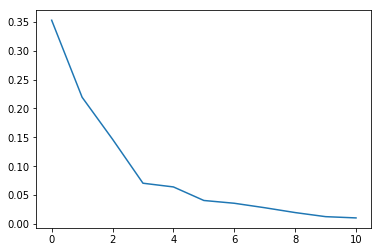

In [18]:
print(np.round(pca.explained_variance_ratio_, 2))
plt.plot(range(X.shape[1]), pca.explained_variance_ratio_)

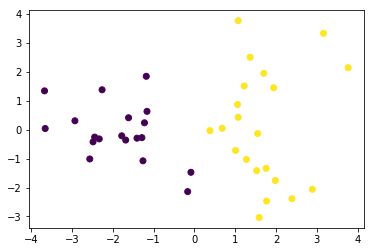

In [19]:
plt.scatter(PCx[:, 0], PCx[:, 1], c=y)

Казалось бы, всего половина объясненной дисперсии, а разделяется замечательно

А теперь сравним с tSNE

In [20]:
TSx = tsne.fit_transform(X,)

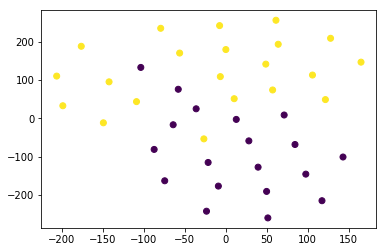

In [21]:
plt.scatter(TSx[:, 0], TSx[:, 1], c=y)

tSNE работает не так хорошо, со скаленными данными тоже

**В общем, попробуем KNN**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_jobs=4)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
accuracy_score(y_test, knn.predict(X_test))

0.95

Неа, надо подбирать метрику или параметры. Займемся этим

In [26]:
param_grid = {'n_neighbors': [1,5,7, 9, 10,11,  12], 
              'p': [1,2], 
              'weights':['uniform', 'distance'],}
grid_knn = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5, verbose=True, )

In [27]:
grid_knn.fit(X, y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 5, 7, 9, 10, 11, 12], 'p': [1, 2], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [28]:
grid_knn.best_score_, grid_knn.best_params_

(0.975, {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'})

In [29]:
bst_knn = grid_knn.best_estimator_

In [30]:
bst_knn.fit(X_train, y_train)
accuracy_score(y_test, bst_knn.predict(X_test))

0.9

Cкор упал. Наверное, примеры в пространстве не создают явных кластеров, несмотря на то, что гиперплоскостью все делится идеально

Напоследок проверим как лог-рег обработает скаленные данные

In [31]:
SS = StandardScaler()
Scaled_X_train, Scaled_X_test = SS.fit_transform(X_train), SS.fit_transform(X_test)
logreg = LogisticRegression()
logreg.fit(Scaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
accuracy_score(y_test, logreg.predict(Scaled_X_test))

1.0

Так же хорошо